- #### Before running the notebook fill the `App_Parameters.csv`, where:
    - *Question_label* is optional and may specify any reference to the question, e.g. 'what is cross-validation'
    - *Correct_Answer* is the correct answer referring the *Question_reference* order
    - *Exam_A* should be your reference for question ordering, i.e. should go from 1 to total number of questions and match with *Question_reference*
    - *Exam_xx* apart from 'A' should include the mapping of the shuffled (if any) order of question, with respect to *Exam_A* ordering


- The code doesn't require any other input apart from the csv separator. In the first line of the code change `SEP`


- The tool saves checkpoint every time a new student is submitted. When launching the tool a list of stored students is displayed. Then you can choose to:
    - `Load and enter new`: add student to existing list
    - `Delete checkpoint and continue`: delete all checkpoint and start entering students from scratch
    - `Remove student`: allow to delete one or multiple students from the list
    - `Close`: close the tool
    - `Get results from checkpoint`: produce results from checkpoint list and save csv in notebook folder
    
   
- When entering new students, sanity check on entered answers is performed and warning message will appear in case of wrong inputs. If `Submit` button seems not to work, scroll all answers to check for warning messages.


- A check on duplicated students is performed at the end. The tool allows to remove all duplicated students


- To see results statistics scroll down at the bottom of the notebook.


- Results tables are saved as csv in notebook folder

,Student,Matricola,Exam,Missing,N,Y,Mark
8,Barbara Tarantino,470370,A,0,2,29,29
40,Nicolas Dienes,-,C,0,2,29,29
5,Annachiara Schettini,478609,C,0,3,28,28
9,Baris Yuksel,479327,A,0,3,28,28
52,Zeno Geddo,485625,C,0,4,27,27
44,Pieter Gobin,478716,A,0,4,27,27
13,Camilla Genitoni,477518,B,0,4,27,27
21,Francesco Manotvani,478599,C,0,5,26,26
46,Simone Dulcis,478422,A,1,4,26,26
30,Klajdi Poshnjari,477521,A,0,5,26,26


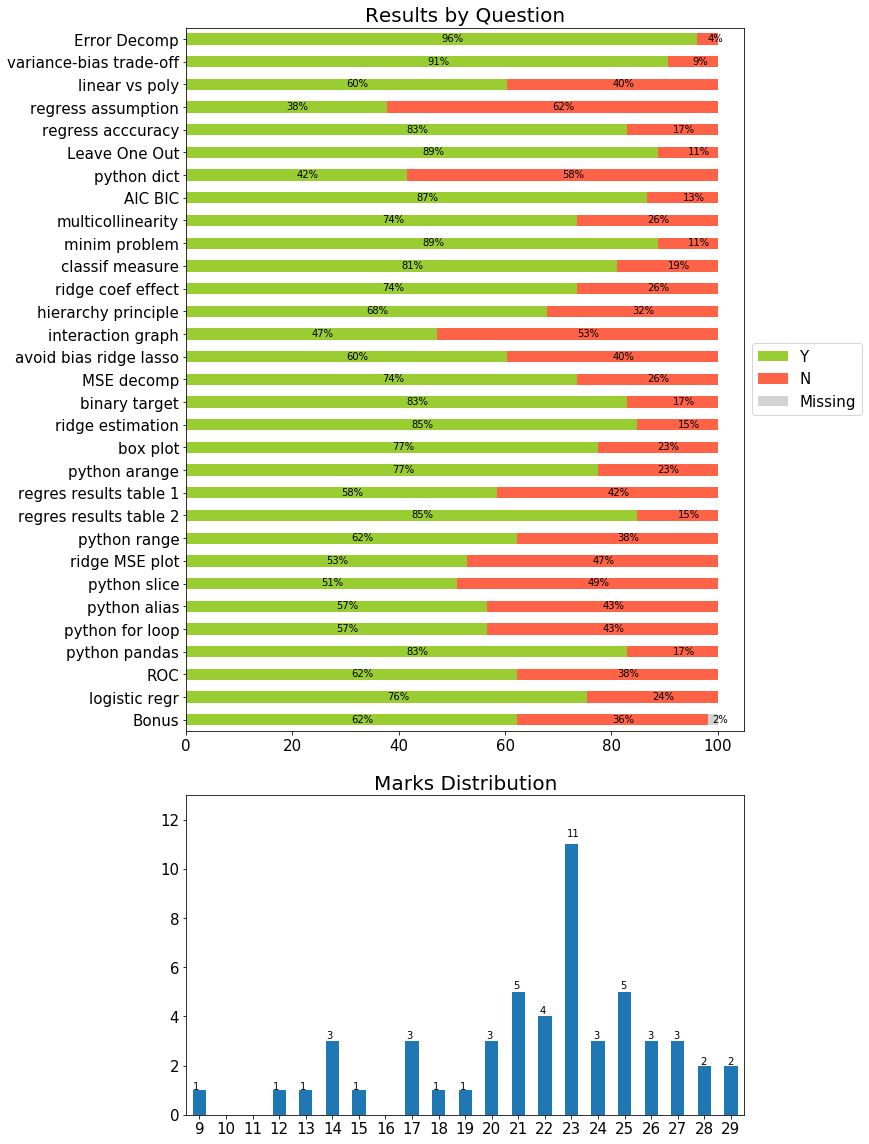

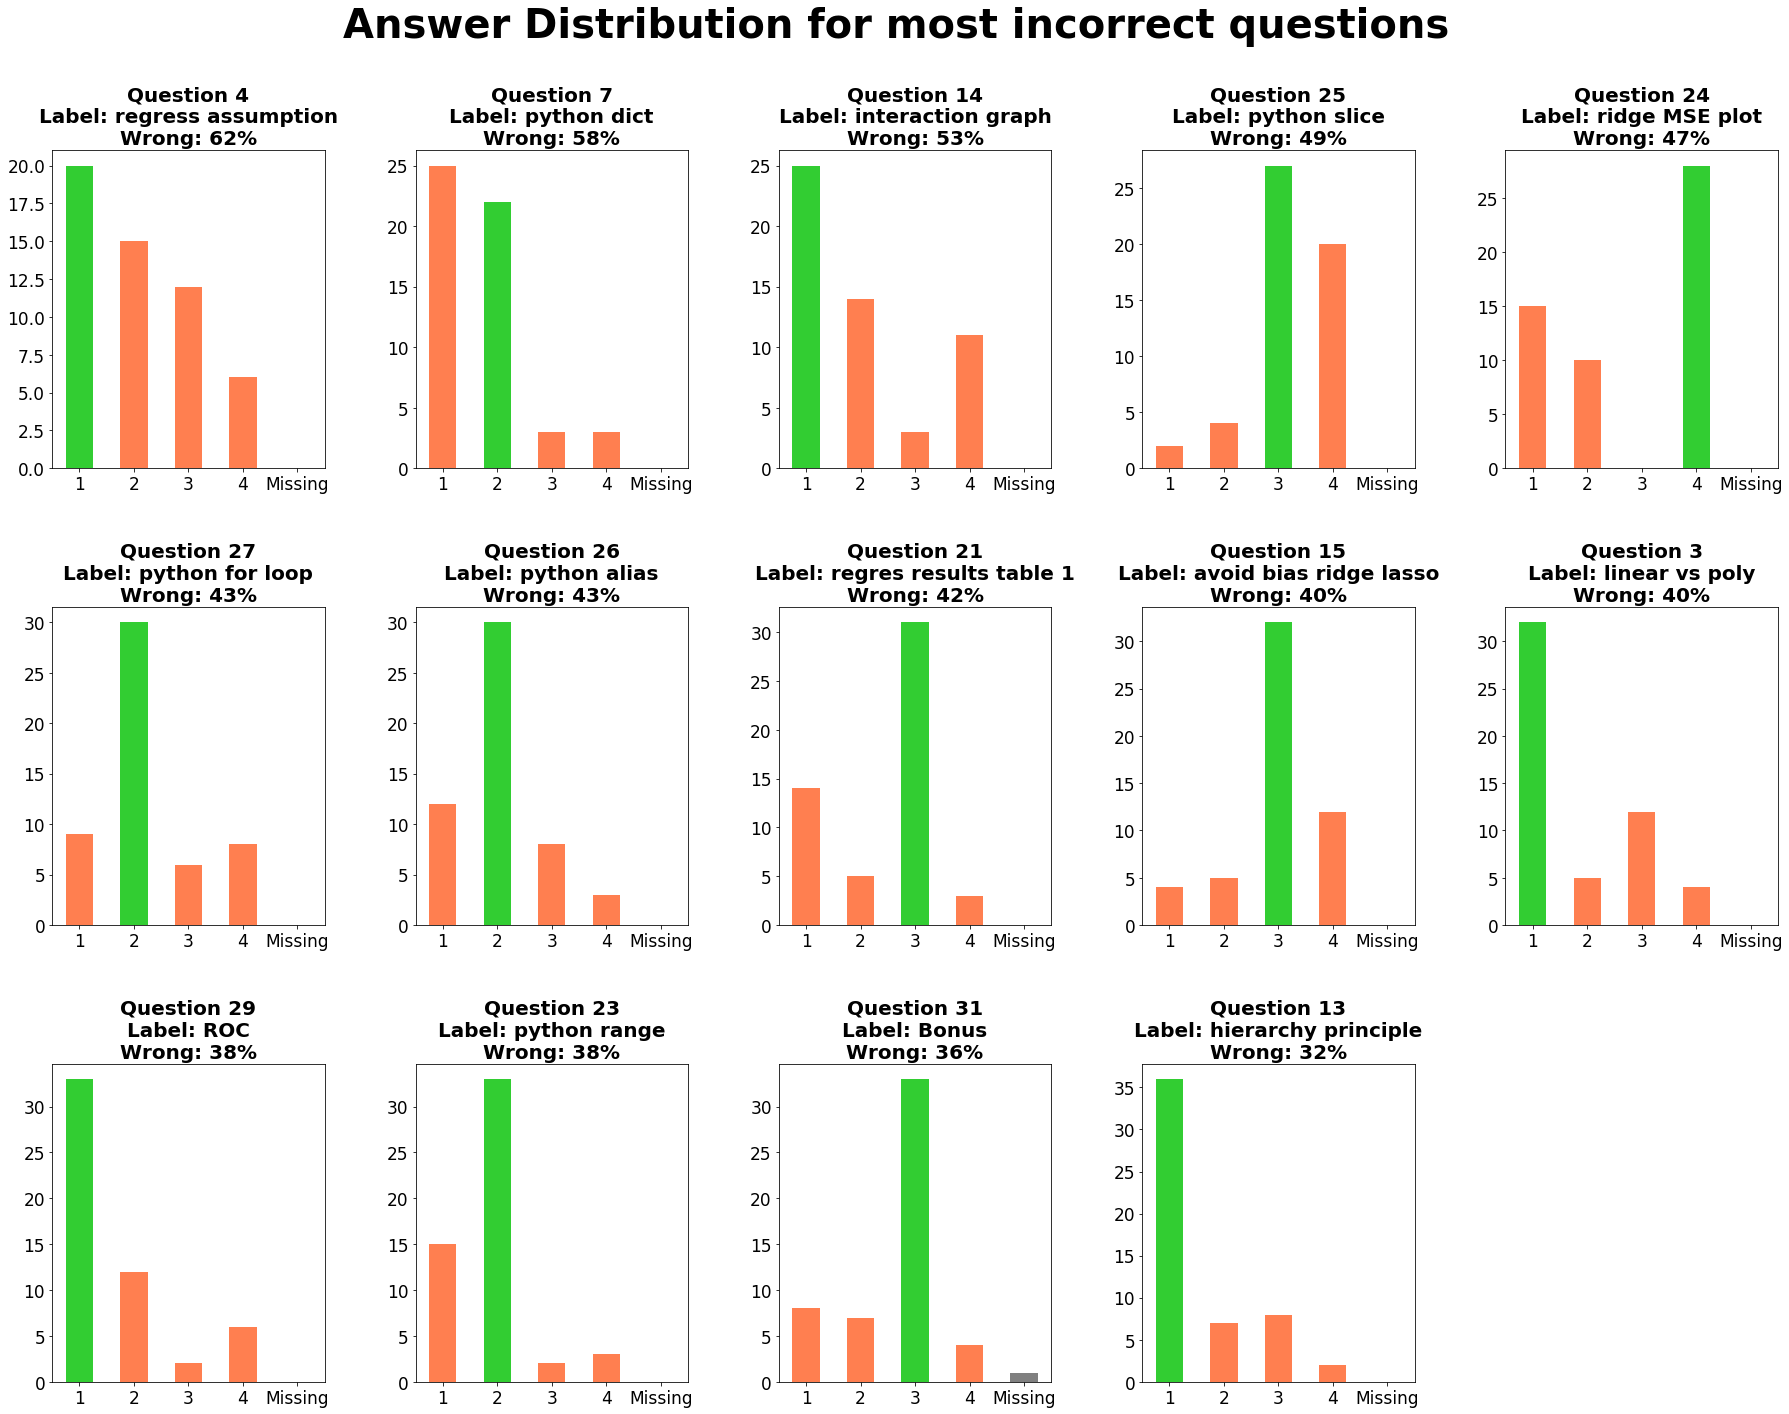

In [67]:
from tkinter import *
import string
import pickle
import os
import pandas as pd
import numpy as np
import collections
import math
%matplotlib inline
import matplotlib.pyplot as plt

SEP=','

class Report_exam:
    
    def __init__(self, root, launch_entry_flag):

        # gets parameters from 'App_Parameters.csv'
        self.parameters = pd.read_csv("App_Parameters.csv", sep=SEP, dtype=str)
        self.number_of_exam = sum([v.startswith('Exam') for v in list(self.parameters.columns)])
        self.tot_questions = self.parameters.shape[0]
        self.exam_list = [' '] + list(string.ascii_uppercase)[0:self.number_of_exam]

        self.append_flag = False
        self.keep_loop_flag = True
        
        if launch_entry_flag:
            
            # force window to open foregroud
            root.attributes("-topmost", True)
        
            # define main window and frames
            self.mainContainer = Frame(root)
            self.mainContainer.pack()
            self.stopLoopContainer = Frame(self.mainContainer)
            self.stopLoopContainer.pack(side = 'top', fill = 'x')
            self.stopLoop_button = Button(self.stopLoopContainer, text = 'Quit and get results', command=self.stop_loop).pack(anchor = 'e', padx=10, pady=5)
            self.examContainer = Frame(self.mainContainer)
            self.examContainer.pack(side = 'bottom')

            # get frame size for windows positioning
            windowWidth = self.mainContainer.winfo_reqwidth()
            windowHeight = self.mainContainer.winfo_reqheight()
            # Gets both half the screen width/height and window width/height
            positionRight = int(root.winfo_screenwidth()/2 - windowWidth/2) - 200
            positionDown = 50#int(root.winfo_screenheight()/2 - windowHeight/2)
            root.geometry("+{}+{}".format(positionRight, positionDown))

            # initialize variable
            self.current_exam = StringVar(root)
            self.current_exam.set(' ')
            self.student_name = StringVar(root)
            self.matricola = StringVar(root)
            self.options_number = IntVar(root)
            self.options_number.set(4)

            # bind mouse wheel to scrollbar
            root.bind_all("<MouseWheel>", self.scroll_mousewheel)
            
            # launch entry tool
            self.enter_answer()
        else:
            self.keep_loop_flag = True

    def enter_answer(self):
        # define frame
        self.inputContainer = Frame(self.mainContainer)
        self.inputContainer.pack(side = 'top')
        self.options_lab = Label(self.inputContainer, text = "Number of options for each question:").grid(row = 0, sticky=E)
        self.options_entry = Entry(self.inputContainer, textvariable = self.options_number, width=2)
        self.options_entry.grid(row = 0, column = 1, sticky=W, padx=5, pady=1)
        self.student_lab = Label(self.inputContainer, text = "Student name:").grid(row = 1, sticky=E)
        self.student_entry = Entry(self.inputContainer, textvariable = self.student_name, width=30)
        self.student_entry.grid(row = 1, column = 1, sticky=W, padx=5, pady=1)
        self.student_entry.focus_set()
        self.matricola_lab = Label(self.inputContainer, text = "Matricola:").grid(row = 2, sticky=E)
        self.matricola_entry = Entry(self.inputContainer, textvariable = self.matricola, width=10)
        self.matricola_entry.grid(row = 2, column = 1, sticky=W, padx=5, pady=1)
        
        self.examContainer = Frame(self.mainContainer,width=self.mainContainer.winfo_screenmmwidth(), height=30)
        self.examContainer.pack()
        self.exam_lab = Label(self.examContainer, text = "Exam:").place(x=171, y=0)
        
        print()
        
        for cc, val in enumerate(self.exam_list):
            if val != ' ':
                b = Radiobutton(self.examContainer, text=val,variable=self.current_exam, value=val,command=self.select_exam)
                b.place(x=180 + cc*35, y=0)

    def select_exam(self, *args):
        
        if self.current_exam.get() != ' ':
            
            # cleans answer table if current_exam changes
            try:
                self.answerContainer.destroy()
                self.submitContainer.destroy()
            except:
                pass
            
            # create exam choice input
            self.get_exam_answers()
        
    def scroll_config(self, event):
        self.scrollCanvas.configure(scrollregion=self.scrollCanvas.bbox("all"),width=self.mainContainer.winfo_screenmmwidth(),height=300)
    
    def get_exam_answers(self):
        '''generates table of answers and get values'''
        
        # create frame
        self.submitContainer = Frame(self.mainContainer)
        self.submitContainer.pack(side = 'bottom')
        self.answerContainer = Frame(self.mainContainer,relief=GROOVE,bd=1)
        self.answerContainer.pack(side = 'bottom')
        # create canvas with scroll frame inside
        self.scrollCanvas=Canvas(self.answerContainer)
        self.scrollCanvas.configure(yscrollincrement=1)
        self.scrollFrame=Frame(self.scrollCanvas)
        myscrollbar=Scrollbar(self.answerContainer,orient="vertical",command=self.scrollCanvas.yview)
        self.scrollCanvas.configure(yscrollcommand=myscrollbar.set)
        myscrollbar.pack(side="right",fill="y")
        self.scrollCanvas.pack(side="left")
        self.scrollCanvas.create_window((10,10),window=self.scrollFrame,anchor='nw')
        self.scrollFrame.bind("<Configure>",self.scroll_config)
        # create table
        Label(self.scrollFrame, text = 'Please enter number from 1 to ' + str(self.options_number.get()) + '\n Use [TAB] to quickly jump cells', fg = 'red').grid(column = 1)
        self.answer_list = {}
        for i in range(self.tot_questions):
            Label(self.scrollFrame, text = 'Question ' + str(i+1)).grid(row = i + 1, column = 0, sticky=W)
            entry = Entry(self.scrollFrame)
            entry.grid(row = i + 1, column = 1)
            entry.bind("<FocusIn>", self.scroll_with_focus)
            self.answer_list[str(i+1)] = entry
        # create submit button
        submit_button = Button(self.submitContainer, text = 'Submit', command=self.submit).pack()#grid(row = i + 2, column = 1)
        discard_button = Button(self.submitContainer, text = 'Discard', command=self.discard).pack()#grid(row = i + 3, column = 1)
        
    def scroll_with_focus(self, event):
        widget_top = event.widget.winfo_y()
        widget_bottom = widget_top + event.widget.winfo_height()
        canvas_top = self.scrollCanvas.canvasy(0)
        canvas_bottom = canvas_top + self.scrollCanvas.winfo_height()

        if widget_bottom > canvas_bottom:
            delta = int(canvas_bottom - widget_bottom) - 10
            self.scrollCanvas.yview_scroll(-delta, "units")
        elif widget_top < canvas_top:
            delta = int(widget_top - canvas_top) - 10
            self.scrollCanvas.yview_scroll(delta, "units")

    def scroll_mousewheel(self, event):
        self.scrollCanvas.yview_scroll(int(-40*(event.delta/120)), "units")
        
    def submit(self):
        # parse answer dictionary and student name
        raw_dict = {k: v.get() for k, v in self.answer_list.items()}
        error_check = 0
        for i in range(1, len(raw_dict)+1):
            Label(self.scrollFrame, text = ' '*25).grid(row = i, column = 2, sticky=W) # clear previous error message
            v = raw_dict[str(i)]
            warn = ''
            # check for number range
            if v.isdigit():
                if int(v) < 1 or int(v) > self.options_number.get():
                    warn = 'only [1,' + str(self.options_number.get()) + ']'
            # check for invalid char
            else:
                if v!='':
                    warn = 'not allowed'
            if warn != '':
                Label(self.scrollFrame, text = warn, fg='red').grid(row = i, column = 2, sticky=W)
                error_check += 1
                
        # check empty student name
        if self.student_name.get()=='' or self.matricola.get()=='':
            error_check += 1
            self.stud_wind = Toplevel(root)
            frame = Frame(self.stud_wind)
            frame.pack()
            Label(frame, text = 'Please enter Student Name and Matricola').grid(padx=20,pady=20)
            Button(frame, text = 'Continue', command=self.close_window_stud).grid(row=1, column = 1, padx=10,pady=10)
            # get frame size for windows positioning
            windowWidth = frame.winfo_reqwidth()
            windowHeight = frame.winfo_reqheight()
            # Gets both half the screen width/height and window width/height
            positionRight = int(self.stud_wind.winfo_screenwidth()/2 - windowWidth/2)
            positionDown = int(self.stud_wind.winfo_screenheight()/2 - windowHeight/2)
            self.stud_wind.geometry("+{}+{}".format(positionRight, positionDown))

        # check all empty answer
        answ_set = {v for _, v in raw_dict.items()}
        if len(answ_set) == 1 and '' in answ_set:
            error_check += 1
            self.empty_wind = Toplevel(root)
            frame = Frame(self.empty_wind)
            frame.pack()
            Label(frame, text = 'All answers are empty').grid(padx=20,pady=20)
            Button(frame, text = 'Continue', command=self.close_window_empty).grid(row=1, column = 1, padx=10,pady=10)
            # get frame size for windows positioning
            windowWidth = frame.winfo_reqwidth()
            windowHeight = frame.winfo_reqheight()
            # Gets both half the screen width/height and window width/height
            positionRight = int(self.empty_wind.winfo_screenwidth()/2 - windowWidth/2)
            positionDown = int(self.empty_wind.winfo_screenheight()/2 - windowHeight/2)
            self.empty_wind.geometry("+{}+{}".format(positionRight, positionDown))
                
        if error_check == 0:
            self.submit_outcome = {'Student': self.student_name.get(),
                                   'Matricola': self.matricola.get(),
                                   'Exam': self.current_exam.get(),
                                   'Answers': raw_dict}
            self.append_flag = True
            root.destroy()
            
    def close_window_stud(self):
        self.stud_wind.destroy()
        
    def close_window_empty(self):
        self.empty_wind.destroy()
        
    def discard(self):
        self.submit_outcome = {}
        self.append_flag = False
        root.destroy()

    def stop_loop(self):
        self.keep_loop_flag = False
        root.destroy()
        
class Load_Checkpoint:
    
    def __init__(self, root):
        
        # force window to open foregroud
        root.attributes("-topmost", True)

        # define main window and frames
        self.headerContainer=Frame(root)
        self.headerContainer.grid()
        self.mainContainer = Frame(root, width=300, height=300)
        self.mainContainer.grid(row=1, sticky=W, padx=10)
        self.buttonContainer=Frame(root)
        self.buttonContainer.grid(row=2, sticky=E)
        self.removeInputContainer=Frame(root)
        self.removeInputContainer.grid(row=3, sticky=W)
        
        # get frame size for windows positioning
        windowWidth = self.mainContainer.winfo_reqwidth()
        windowHeight = self.mainContainer.winfo_reqheight()
        # Gets both half the screen width/height and window width/height
        positionRight = int(root.winfo_screenwidth()/2 - windowWidth/2)
        positionDown = int(root.winfo_screenheight()/2 - windowHeight/2)-150
        root.geometry("+{}+{}".format(positionRight, positionDown))
        
        self.remove_label = StringVar(root)
        self.terminate_flag = False
        self.stop_all_flag = False
        self.launch_entry_flag = True
        
        # check  if checkpoint exist
        if os.path.exists('checkpoint'):
            # load checkpoint
            with open('checkpoint', 'rb') as load_checkpoint:
                self.load_list = pickle.load(load_checkpoint)
            Label(self.headerContainer, text = 'Checkpoint already exist. It contains the following students:', font=(_, 10, 'bold')).grid(pady=5)
            load_stud_list = [v['Student'] for v in self.load_list]
            tt = self.format_list_mult_col(load_stud_list, 20)
            for cc in range(len(tt)):
                Label(self.mainContainer, text = tt[cc], anchor='nw', justify=LEFT).pack(fill='both', side='left')
#             Label(self.mainContainer, text = tt, anchor=W, justify=LEFT).pack(fill='both')#.grid(row = 1, sticky = W, pady=5)
            Button(self.buttonContainer, text = 'Load and enter new', command=self.reload).grid(row = 2, column = 0, sticky = E, padx=10,pady=5)
            Button(self.buttonContainer, text = 'Delete checkpoint and continue', command=self.delete_checkpoint).grid(row = 3, column = 0, sticky = E, padx=10,pady=5)
            Button(self.buttonContainer, text = 'Remove student', command=self.remove_student_popup).grid(row = 4, column = 0, sticky = E, padx=10,pady=5)
            Button(self.buttonContainer, text = 'Close', command=self.close).grid(row = 5, column = 0, sticky = E, padx=10,pady=5)
            Button(self.buttonContainer, text = 'Get results from checkpoint', command=self.close_and_results).grid(row = 6, column = 0, sticky = E, padx=10,pady=5)
        else:
            Label(self.headerContainer, text = 'No previous checkpoint found. Click Continue', font=(_, 10, 'bold')).pack()
            Button(self.buttonContainer, text = 'Continue', command=self.no_load).pack(side='bottom')
            
#     def format_list_mult_col(self, L, max_row):
#         '''provide single string with columns'''
    
#         tot_column=math.ceil(len(L) / max_row)
#         max_string_len=max([len(v) for v in L])+3

#         column_list = ['' for n in range(max_row)]
#         column_list[0]=' '
#         for col in range(tot_column):
#             column_batch=L[(0+col*max_row):(col*max_row+max_row)]
#             column_batch_with_space=[v+' '*(max_string_len - len(v)) for v in column_batch]
#             if col==tot_column-1:
#                 # fill with '' to get same length
#                 if len(column_batch_with_space)<max_row:
#                     column_batch_with_space = column_batch_with_space + [' '*max_string_len for n in range(max_row-len(column_batch_with_space))]
#                 # add new line
#                 column_batch_with_space=[v+'\n' for v in column_batch_with_space]
#             column_list = [i + j for i, j in zip(column_list, column_batch_with_space)]
#         final_string = ' '.join(column_list)

#         return final_string

    def format_list_mult_col(self, L, max_row):
        '''provide multiple columns to be used in different Label()'''
    
        tot_column=math.ceil(len(L) / max_row)
        max_string_len=max((max([len(v) for v in L]),35))

        column_list = []
        for col in range(tot_column):
            column_batch=L[(0+col*max_row):(col*max_row+max_row)]
            column_batch_with_space=[v+' '*(max_string_len - len(v)) for v in column_batch]
            # add new line
            column_batch_with_space=[v+'\n' for v in column_batch_with_space]
            column_list.append(''.join(column_batch_with_space))

        return column_list

    def no_load(self):
        self.load_flag = False
        root.destroy()
        
    def reload(self):
        self.load_flag = True
        root.destroy()
        
    def delete_checkpoint(self):
        self.load_flag = False
        os.remove('checkpoint')
        root.destroy()
        
    def remove_student_popup(self):
        
        start_row = 0
        Label(self.removeInputContainer, text = """Enter students name. Pay attention on case.
        If you want to remove multiple students, please use \',\'""",fg='red', font=(_, 10, 'bold')).grid(row = start_row, column = 0, sticky = W)
        entry = Entry(self.removeInputContainer, textvariable = self.remove_label, width=50)
        entry.grid(row = start_row+1, column = 0, sticky = W, padx=10,pady=5)
        entry.focus_set()
        Button(self.removeInputContainer, text = 'Remove and save checkpoint', command=self.remove_student).grid(row = start_row+2, sticky = W, padx=10,pady=5)
        
        
    def remove_student(self):
        # refresh frame
        try:
            self.removeContainer.destroy()
        except:
            pass
        self.removeContainer=Frame(root)
        self.removeContainer.grid(row=4, sticky=W)
        
        remove_label_parsed = self.remove_label.get()
        # split by comma and remove leadding and trailing spaces
        remove_label_parsed = remove_label_parsed.split(',')
        remove_label_parsed = [v.strip() for v in remove_label_parsed]
        # check if student name is present
        student_list = [v['Student'] for v in self.load_list]
        rr = 0
        for s in remove_label_parsed:
            # clear previous message
            Label(self.removeContainer, text = ' '*50).grid(row = rr, column = 0, sticky = W)
            if s in student_list:
                self.load_list = [v for v in self.load_list if v['Student'] != s]
                Label(self.removeContainer, text = s + ' removed').grid(row = rr, column = 0, sticky = W)
            else:
                Label(self.removeContainer, text = s + ' not found in checkpoint list', fg='red').grid(row = rr, column = 0, sticky = W)
            rr += 1
        Button(self.removeContainer, text = 'Continue', command=self.close_continue).grid(row = rr, column = 0, sticky = W, padx=10, pady=5)
        self.terminate_flag = True
        with open('checkpoint', 'wb') as save_checkpoint:
            pickle.dump(self.load_list, save_checkpoint)
        
    def close_continue(self):
        root.destroy()
    
    def close(self):
        self.terminate_flag = False
        self.stop_all_flag = True
        root.destroy()
    
    def close_and_results(self):
        self.terminate_flag = False
        self.load_flag = True
        self.launch_entry_flag = False
        root.destroy()

class Duplicated_Found:
    def __init__(self, root, duplicated_students, final_list):
        
        self.final_list_no_dupl = final_list
        self.flag_duplicates = True
        
        # force window to open foregroud
        root.attributes("-topmost", True)
        
        # define main window and frames
        self.mainContainer = Frame(root, width=300, height=300)
        self.mainContainer.pack()
        
        # get frame size for windows positioning
        windowWidth = self.mainContainer.winfo_reqwidth()
        windowHeight = self.mainContainer.winfo_reqheight()
        # Gets both half the screen width/height and window width/height
        positionRight = int(root.winfo_screenwidth()/2 - windowWidth/2)
        positionDown = int(root.winfo_screenheight()/2 - windowHeight/2)
        root.geometry("+{}+{}".format(positionRight, positionDown))

        Label(self.mainContainer, text = 'Warning, duplicated students found:', font=(_, 10, 'bold')).grid(pady=5)
        Label(self.mainContainer, text = '\n'.join(duplicated_students)).grid(row = 1, sticky = W, pady=5)
        Label(self.mainContainer, text = 'Note that all duplicates with same name will be removed', fg='red').grid(row = 2, sticky = W, pady=5)
        Button(self.mainContainer, text = 'Close', command=self.close).grid(row = 3, column = 0, sticky = E, padx=5, pady=5)
        Button(self.mainContainer, text = 'Remove all duplicates and save checkpoint', command=self.remove_duplicates).grid(row = 4, column = 0, sticky = E, padx=5, pady=5)
    
    def close(self):
        root.destroy()
        
    def remove_duplicates(self):
        # remove duplicates
        self.final_list_no_dupl = [v for v in final_list if v['Student'] not in duplicated_students]
        self.flag_duplicates = False
        
        # save pickle
        with open('checkpoint', 'wb') as save_checkpoint:
            pickle.dump(self.final_list_no_dupl, save_checkpoint)
        
        Label(self.mainContainer, text = 'Results have been produced without duplicates', font=(_, 10, 'bold')).grid(row = 5, pady=5)
        Button(self.mainContainer, text = 'Close', command=self.close).grid(row = 6, column = 0, sticky = E, padx=5, pady=5)


def Get_Results(parameters, tot_questions, final_list):

    results = pd.DataFrame(columns = ['Student', 'Matricola', 'Exam', 'Question', 'Question Label', 'Answer', 'Correct'], dtype=str).fillna('')

    for v in final_list:
        student = np.array([v['Student']] * tot_questions, dtype=str)[:, np.newaxis]
        exam = np.array([v['Exam']] * tot_questions, dtype=str)[:, np.newaxis]
        matricola = np.array([v['Matricola']] * tot_questions, dtype=str)[:, np.newaxis]
        question = np.arange(tot_questions)[:, np.newaxis] + 1
        question_lab = parameters['Question_label'].values[:, np.newaxis]
        # match exam
        match_index = parameters[['Question_reference','Exam_' + v['Exam']]].values
        mapped_answer = pd.DataFrame(columns=['Question_reference', 'Shuffled_ind', 'Answer'])
        for m in match_index:
            mapped_answer = mapped_answer.append(pd.DataFrame([[m[0], m[1], v['Answers'][str(m[1])]]], columns=mapped_answer.columns))
        true_answ=parameters[['Question_reference', 'Correct_Answer']]
        correct =mapped_answer.merge(true_answ, left_on='Question_reference', right_on='Question_reference')
        correct['Correct'] = np.where(correct['Answer'] == correct['Correct_Answer'], 'Y', 'N')
        correct.Correct[correct['Answer'] == ''] = 'Missing'
        rows_to_add = pd.DataFrame(np.hstack((student, matricola, exam, question, question_lab, correct[['Answer', 'Correct']])),
                  columns=results.columns)
        results=results.append(rows_to_add)
    
    # spread questions on columns
    results_by_students = results.groupby(['Student', 'Matricola', 'Exam', 'Question'])['Correct'].max().unstack('Question') # max or whatever is appplied to only one element, so no problem
    results_by_students.columns=parameters.Question_label
    
    # same as above but with answer (to create distribution of answer for each question)
    results_by_students_answers = results.groupby(['Student', 'Matricola', 'Exam', 'Question'])['Answer'].max().unstack('Question') # max or whatever is appplied to only one element, so no problem
    results_by_students_answers.columns=parameters.Question_label
    
    # student summary with marks
    results_student_summary=results.groupby(['Student', 'Matricola', 'Exam', 'Correct']).size().unstack().reset_index().rename_axis(None, axis=1).fillna(0)
    results_student_summary.loc[:, ['Y', 'N', 'Missing']]=results_student_summary.loc[:, ['Y', 'N', 'Missing']].astype(int)
    results_student_summary['Mark']=results_student_summary['Y']
    results_student_summary.sort_values(by='Y', ascending=False, inplace=True)
    
    # questions summary
    question_reference = results[['Question','Question Label']].drop_duplicates().sort_values(by=['Question'])
    results_by_question=results.groupby(['Question Label', 'Correct']).size().reset_index().pivot(columns='Correct', index='Question Label').fillna(0)
    results_by_question.columns = results_by_question.columns.droplevel(0)
    results_by_question=results_by_question.reset_index()
    results_by_question=pd.merge(results_by_question, question_reference, on='Question Label').sort_values(by=['Question'], ascending=False).set_index('Question')
    results_by_question=results_by_question.loc[:, ['Question Label', 'Y', 'N', 'Missing']]
    results_by_question.loc[:,'Y':'Missing'] = round(results_by_question.loc[:,'Y':'Missing'] / results.Student.drop_duplicates().count() * 100, 1)
    
    return(results, results_by_students, results_by_students_answers, results_student_summary, results_by_question)

def print_results(results_student_summary, results_by_question):

    fig = plt.figure(figsize=(10,20))

    # question bar plot (percentage of 'Y', 'N', 'Missing')
    ax1 = fig.add_subplot(3,1,(1,2))
    results_by_question.plot(kind='barh',stacked=True,legend=True,color=['yellowgreen','tomato','lightgrey'], ax=ax1)
    ax1.set_yticklabels(results_by_question['Question Label'])
    ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)
    ax1.tick_params(labelsize=15)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title('Results by Question', fontsize=20)
    # put values in the middle of the bar
    for rowNum,row in results_by_question.iterrows():
        xpos = 0
        for val in row['Y':'Missing']:
            val = float(val)
            if val!=0:
                ax1.text(xpos + val / 2, results_by_question.shape[0]-rowNum-0.1, str(round(val))+'%', color='black')
            xpos += val
        xpos = 0
    extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('1.Question_answer_percentage.png', dpi=300, bbox_inches=extent.expanded(1.7, 1.1))

    # marks distribution
    min_mark = min(results_student_summary.Mark)
    max_mark = max(results_student_summary.Mark)
    ax2 = fig.add_subplot(3,1,3)
    r_count=results_student_summary.Mark.value_counts().sort_index().reindex(range(min_mark,max_mark+1))
    r_count.plot(kind='bar', rot=0, ax=ax2)
    ax2.set_title('Marks Distribution', fontsize=20)
    ax2.tick_params(labelsize=15)
    ax2.set_ylim(top=max(r_count)+2)
    for p in ax2.patches:
        lab=''
        if int(p.get_height())!=0:
            lab=str(int(p.get_height()))
        ax2.annotate(lab, (p.get_x() * 1.005, p.get_height() * 1.03),fontsize=10)
    extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('2.Mark_distribution.png', dpi=200, bbox_inches=extent.expanded(1.2, 1.2))

def wrong_answer_distribution(parameters, results_by_students_answers, results_by_question, wrong_answer_cutoff=30, ncol=5):
    # wrong_answer_cutoff: minimum error percentage to explore answers distribution

    wrong_answer=results_by_question[results_by_question.N > wrong_answer_cutoff].sort_values(by='N', ascending=False)
    max_answer=int(results_by_students_answers.max().max())
    all_answers=[str(n) for n in range(1,max_answer+1)] + ['Missing']

    fig = plt.figure(figsize=(25,20))

    i=1
    ft_size=20
    for index, row in wrong_answer.iterrows():
        quest=row['Question Label']
        wrong_perc=row['N']
        ax = fig.add_subplot(math.ceil(wrong_answer.shape[0] / ncol), ncol, i)
        bar_col=['coral']*max_answer + ['grey']
        bar_col[int(parameters[parameters.Question_label==quest]['Correct_Answer'])-1]='limegreen'
        results_by_students_answers[quest].replace(to_replace ='', value ='Missing').value_counts().sort_index().reindex(all_answers).fillna(0).plot(kind='bar', rot=0, ax=ax, color=bar_col)
        ax.set_title('\n\nQuestion ' + str(index) + '\nLabel: ' + row['Question Label'] + '\nWrong: ' + str(round(row['N'])) + '%', fontsize=ft_size, weight='bold')
        ax.tick_params(labelsize=ft_size-3)
        i+=1
    fig.suptitle('Answer Distribution for most incorrect questions', fontsize=40, weight='bold')
    plt.tight_layout()
    fig.subplots_adjust(top=0.88)
    fig.savefig('3.Wrong_question_distribution.png', dpi=300)

# lauch load menu and relaunch if students are removed
keep_load = True
while keep_load:
    root = Tk()
    Load_Checkpoint_inst = Load_Checkpoint(root)
    root.mainloop()
    keep_load = Load_Checkpoint_inst.terminate_flag

if Load_Checkpoint_inst.stop_all_flag == False:
    # check for reload checkpoint
    if Load_Checkpoint_inst.load_flag:
        with open('checkpoint', 'rb') as load_checkpoint:
            final_list = pickle.load(load_checkpoint)
    else:
        final_list = []

    # run entry tool
    while True:
        
        if Load_Checkpoint_inst.launch_entry_flag:
            root = Tk()
            Report_exam_inst = Report_exam(root, Load_Checkpoint_inst.launch_entry_flag)
            root.mainloop()
        else:
            Report_exam_inst = Report_exam(_, False)
        if Report_exam_inst.append_flag:
            final_list.append(Report_exam_inst.submit_outcome)
            # save pickle
            with open('checkpoint', 'wb') as save_checkpoint:
                pickle.dump(final_list, save_checkpoint)
        if Report_exam_inst.keep_loop_flag == False or Load_Checkpoint_inst.launch_entry_flag == False:
            break

    # check for duplicated Student and get results
    student_list = [v['Student'] for v in final_list]
    duplicated_students = [item for item, count in collections.Counter(student_list).items() if count > 1]
    flag_duplicates = False
    if (len(duplicated_students) > 0):
        print('\n\n########### Warning, duplicated students found:\n')
        print(*duplicated_students, sep='\n')
        root = Tk()
        Duplicated_Found_inst = Duplicated_Found(root, duplicated_students, final_list)
        root.mainloop()
        final_list = Duplicated_Found_inst.final_list_no_dupl
        flag_duplicates = Duplicated_Found_inst.flag_duplicates
    if flag_duplicates == False:
        results, results_by_students, results_by_students_answers, results_student_summary, results_by_question = Get_Results(Report_exam_inst.parameters, Report_exam_inst.tot_questions, final_list)

    # print and save results
    print_results(results_student_summary, results_by_question)
    wrong_answer_distribution(Report_exam_inst.parameters, results_by_students_answers, results_by_question, wrong_answer_cutoff=30, ncol=5)
    display(results_student_summary)
    results_by_question[::-1].to_csv('Results_by_Question.csv',sep=SEP)
    results_by_students.to_csv('Results_by_Student.csv',sep=SEP)
    results_student_summary.to_csv('Results_Student_summary.csv',sep=SEP,index=False)
